<a href="https://colab.research.google.com/github/baradmukta/eda-capstone-project-1/blob/main/individual_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

# **Problem Statement**
  ### **Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today Airbnb became one of a kind service that is used and recognised by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. these millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customer's and provider's (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values. Explore and analyse the data to discover key understandings.**


* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?

  

***airbnb is a service that lets property owners rent out their spaces to travelers looking for a place to stay. Travelers can rent a space for multiple people to share, a shared space with private rooms, or the entire property for themselves.***

id = unique id 

name = name of listing 

host id = unique host id

host name = name of the host

neighbourhood group = location

neighbourhood = area

lattitude = listing lattitude

longitude = listing longitude

room type = type of listing (entire room, private room, shared room)

price = price of listing

minimum nights = minimum nights to be paid for

number_of_reviews = number of reviews

last_review = date of the last review

reviews_per_month = number of checks per month

calculated_host_listings_count = total count of listing done by host on airbnb in particular neighbourhood

availability_365 = availability around the year




**Import Libraries**

In [ ]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import all the required libraries and modules
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ast
from datetime import datetime
from datetime import date

In [ ]:
# upload the data using pandas module
airbnb=pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

In [ ]:
# read the first five rows
airbnb.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,2539,2595,3647,3831,5022,5099,5121,5178,5203,5238
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park,Large Cozy 1 BR Apartment In Midtown East,BlissArtsSpace!,Large Furnished Room Near B'way,Cozy Clean Guest Room - Family Apt,Cute & Cozy Lower East Side 1 bdrm
host_id,2787,2845,4632,4869,7192,7322,7356,8967,7490,7549
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura,Chris,Garon,Shunichi,MaryEllen,Ben
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem,Murray Hill,Bedford-Stuyvesant,Hell's Kitchen,Upper West Side,Chinatown
latitude,40.64749,40.75362,40.80902,40.68514,40.79851,40.74767,40.68688,40.76489,40.80178,40.71344
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399,-73.975,-73.95596,-73.98493,-73.96723,-73.99037
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Private room,Private room,Entire home/apt
price,149,225,150,89,80,200,60,79,79,150


In [ ]:
# read the last 5 rows
airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
# rows and columns count
airbnb.shape

(48895, 16)

In [ ]:
# Dataset info
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# checking the null value counts
print(airbnb.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


there are missing / null values in host name, name, last review, reviews per month. 

In [ ]:
# check columns in the data
airbnb.columns 

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# describe the data
airbnb.describe().astype(int).T

,count,mean,std,min,25%,50%,75%,max
id,48895,19017143,10983108,2539,9471945,19677284,29152178,36487245
host_id,48895,67620010,78610967,2438,7822033,30793816,107434423,274321313
latitude,48895,40,0,40,40,40,40,40
longitude,48895,-73,0,-74,-73,-73,-73,-73
price,48895,152,240,0,69,106,175,10000
minimum_nights,48895,7,20,1,1,3,5,1250
number_of_reviews,48895,23,44,0,1,5,24,629
reviews_per_month,38843,1,1,0,0,0,2,58
calculated_host_listings_count,48895,7,32,1,1,1,2,327
availability_365,48895,112,131,0,0,45,227,365


here price, minimum nights, number of reviews, reviews per month, calculated host listing count, availability of room during 365 are the numerical data.
minimum price is 0 and maximum is 10,000.
average price is 152.
on an average people stay for 7 days in a room. 

In [ ]:
# describe the categorical data
airbnb.describe(include='O').T

,count,unique,top,freq
name,48879,47905,Hillside Hotel,18
host_name,48874,11452,Michael,417
neighbourhood_group,48895,5,Manhattan,21661
neighbourhood,48895,221,Williamsburg,3920
room_type,48895,3,Entire home/apt,25409
last_review,38843,1764,2019-06-23,1413


from this describe table we can conclude that name, host name, neighbourhood group, neighbourhood, room type, last review are categorical variable. highest listing is of Michael. highest listing is in Manhattan neighbourhood group. customer prefers entire home mostly. 

In [ ]:
# we will get information about id and host id
print(airbnb['id'].nunique())
print(airbnb['host_id'].nunique())
print(airbnb['host_name'].nunique())

48895
37457
11452


there are unique id for every listing. there are 37457 host id. each host id is different as per the room type, location.

In [ ]:
# counting value of each host id
airbnb['host_id'].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

In [ ]:
#let us see some host id pattern
airbnb[airbnb['host_id']==219517861]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,NaN,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,NaN,NaN,327,339
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,NaN,NaN,327,342
47693,35871515,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,NaN,NaN,327,347
47814,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,NaN,NaN,327,327


here host id ***219517861*** is of ***Sonder*** host who has almost same neighbourhood group and almost same room type and almost same neighbourhood.

In [ ]:
airbnb[airbnb['host_id']==107434423]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
26137,20845031,"Homey Midtown East 1BR w/ Gym, Doorman, near t...",107434423,Blueground,Manhattan,Kips Bay,40.74510,-73.97915,Entire home/apt,308,30,0,NaN,NaN,232,156
29128,22370388,"Calming FiDi 1BR w/ lux Gym, Speakeasy + Doorm...",107434423,Blueground,Manhattan,Financial District,40.70637,-74.00941,Entire home/apt,271,30,1,2018-08-17,0.09,232,310
30158,23264421,"Mod Midtown East 1BR w/ Gym, walk to Grand Cen...",107434423,Blueground,Manhattan,Murray Hill,40.74900,-73.97961,Entire home/apt,289,30,0,NaN,NaN,232,223
30428,23538486,"Posh Park Avenue 1BR w/ Gym, Doorman in Midtow...",107434423,Blueground,Manhattan,Murray Hill,40.74891,-73.97887,Entire home/apt,305,30,1,2019-01-15,0.17,232,326
31506,24535218,"Luxury Tribeca 1BR w/ Gym, Doorman + Roof deck...",107434423,Blueground,Manhattan,Tribeca,40.71433,-74.01073,Entire home/apt,323,30,0,NaN,NaN,232,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48723,36404684,Smart Nolita 1BR w/ W/D near famous cafes by B...,107434423,Blueground,Manhattan,Nolita,40.72283,-73.99472,Entire home/apt,316,30,0,NaN,NaN,232,325
48724,36404784,Dapper Hell's Kitchen 2BR w/ Gym + W/D + Door...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76082,-73.99709,Entire home/apt,385,30,0,NaN,NaN,232,338
48725,36404815,Trendy Hell's Kitchen 1BR w/ Gym + W/D + Doorm...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76083,-73.99727,Entire home/apt,267,30,0,NaN,NaN,232,228
48726,36404936,Beautiful Williamsburg 2BR w/ Skyline views + ...,107434423,Blueground,Brooklyn,Williamsburg,40.71493,-73.96365,Entire home/apt,278,30,0,NaN,NaN,232,188


here also, we can see same pattern. there are some differences but its negligible.  

In [ ]:
#let's see some pattern of host name
airbnb[airbnb['host_name']=='John']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
429,148201,NYC - Sunny Greenwich Village 1br,715807,John,Manhattan,Greenwich Village,40.72831,-74.00177,Entire home/apt,175,3,18,2013-05-31,0.19,1,0
620,234870,Private Room With GREAT Location,1229984,John,Queens,Long Island City,40.74581,-73.95295,Private room,75,30,65,2017-07-31,0.74,3,219
991,400039,Big Beautiful Railroad in Brooklyn,1488809,John,Brooklyn,Bushwick,40.70339,-73.92945,Entire home/apt,130,30,53,2017-06-30,0.68,1,0
1141,484297,Large home in most desirable Brooklyn hood!,2397411,John,Brooklyn,Clinton Hill,40.68545,-73.96534,Entire home/apt,350,4,10,2018-09-12,0.12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47624,35836317,Gorgeous Duplex 2BED/1.5BA Modern,269242923,John,Manhattan,Kips Bay,40.74490,-73.97888,Entire home/apt,288,5,2,2019-06-30,2.00,1,74
47689,35871036,Huge 1 bedroom w/ a backyard near the heart of...,226414996,John,Queens,Ditmars Steinway,40.77170,-73.90799,Entire home/apt,90,3,0,NaN,NaN,2,21
47915,35984474,Perfect Weekend Stay,229739739,John,Brooklyn,Flatbush,40.64726,-73.95455,Private room,85,14,0,NaN,NaN,2,176
48212,36140542,Wonderful Summer Vacation Getaways For Weeken...,229739739,John,Brooklyn,Flatbush,40.64600,-73.95455,Private room,85,7,0,NaN,NaN,2,176


here we can say there is no correlation between host id and host name. hence we cant come to any conclusion regarding to host id and host name.

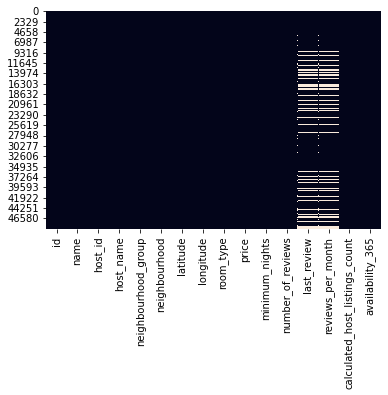

In [ ]:
#heatmap of null values
sns.heatmap(airbnb.isnull(), cbar=False)

here we can say there are much more null values in last reviews and reviews per month.

#**Data Cleaning**

In [ ]:
# here we will delete unnecessary column like last reviews,name. because there is no relevance of last reviews and name of listing in our data.
airbnb.drop(['last_review','name'],axis=1,inplace=True)


In [ ]:
airbnb.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
#here we will replace all missing values in reviews per month with 0
airbnb['reviews_per_month'].fillna(0,inplace=True)
airbnb

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,36485057,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,36485431,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,36485609,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [ ]:
#check if any value is null
airbnb.isnull().sum()

id                                 0
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

there are 21 host name missing. 

In [ ]:
# we will not consider the rows where host name is missing. there will be not much impact on data since percentage of data of host name is negligible
airbnb=airbnb[~airbnb['host_name'].isnull()]
airbnb

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,36485057,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,36485431,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,36485609,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [ ]:
# let's check is there any null value or not
airbnb.isnull().sum()

id                                0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
# let's check how many variation takes place after data cleaning 
airbnb.describe().astype(int).T

,count,mean,std,min,25%,50%,75%,max
id,48874,19019875,10983179,2539,9474068,19679355,29153423,36487245
host_id,48874,67621569,78614153,2438,7823257,30792573,107434423,274321313
latitude,48874,40,0,40,40,40,40,40
longitude,48874,-73,0,-74,-73,-73,-73,-73
price,48874,152,240,0,69,106,175,10000
minimum_nights,48874,7,20,1,1,3,5,1250
number_of_reviews,48874,23,44,0,1,5,24,629
reviews_per_month,48874,1,1,0,0,0,1,58
calculated_host_listings_count,48874,7,32,1,1,1,2,327
availability_365,48874,112,131,0,0,45,227,365


there is not much variation after excluding some rows of host name.

In [ ]:
# lets check highest listing on airbnb of particular host in particular neighnourhood
airbnb[airbnb['calculated_host_listings_count']==327]

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,0.00,327,309
38294,30181945,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,0.73,327,219
38588,30347708,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,0.60,327,159
39769,30937590,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,1.86,327,91
39770,30937591,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,0.00,327,339
47692,35871511,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,0.00,327,342
47693,35871515,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,0.00,327,347
47814,35936418,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,0.00,327,327


here we can see that highest listing is of **Sonder** host in Manhattan neighbourhood group in Financial/Theatre District for entire home room type. **Sonder** is the **busiest host** as per the listing count as well as the availability of room over the year.

In [ ]:
# let's check how much variation takes place after data cleaning
airbnb.describe(include='O').T

,count,unique,top,freq
host_name,48874,11452,Michael,417
neighbourhood_group,48874,5,Manhattan,21652
neighbourhood,48874,221,Williamsburg,3919
room_type,48874,3,Entire home/apt,25400


there is not much variation in the description after data cleaning.

In [ ]:
airbnb.nunique()

id                                48874
host_id                           37439
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19042
longitude                         14717
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
airbnb['calculated_host_listings_count'].unique()

array([  6,   2,   1,   4,   3,   5,   7,  13,  28,  11,   8,   9,  52,
        18,  15,  19,  10,  39,  26,  29,  12,  21,  96,  14,  34,  43,
       121,  37,  49,  31,  91,  16,  87,  33,  23,  50,  20,  25, 232,
        17,  47, 103,  65,  30,  27, 327,  32])

In [ ]:
# estimated revenue. 
airbnb['revenues'] = airbnb['price']*airbnb['minimum_nights']
airbnb.sort_values(by='revenues',ascending=False,inplace=True)
airbnb.head()

<ipython-input-31-a511070fac0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb['revenues'] = airbnb['price']*airbnb['minimum_nights']
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,revenues
48043,36056808,271248669,Jenny,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,6500,180,0,0.00,1,365,1170000
9151,7003697,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0,1000000
12342,9528920,3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,0.14,1,83,989901
17811,13963005,41870118,Iveta,Queens,Forest Hills,40.72064,-73.83746,Entire home/apt,2350,365,0,0.00,1,364,857750
44429,34221161,9295237,Noelle,Queens,Astoria,40.75593,-73.91276,Private room,2000,365,0,0.00,2,0,730000


highest revenue earned by host **Jenny** by one customer of listing id **36056808** . highest price among the host is of **Kathrine**.

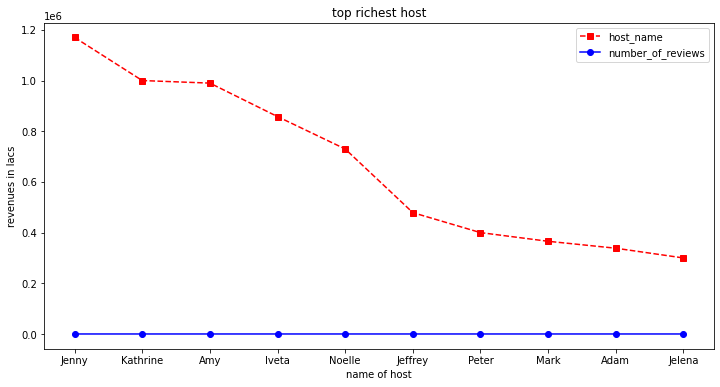

In [ ]:
# plot the top 10 host who earn the most
plt.figure(figsize=(12,6))
plt.plot(airbnb.host_name.head(10),airbnb.revenues.head(10),'s--r')
plt.plot(airbnb.host_name.head(10),airbnb.number_of_reviews.head(10),'o-b')
plt.title('top richest host')
plt.xlabel('name of host')
plt.ylabel('revenues in lacs')
plt.legend(['host_name','number_of_reviews']);

top richest host are Jenny, Kathrine, Amy, Iveta.... we can see from the graph tha the richest host has revenue is between 11 lacs to 12 lacs. also we can see that Jenny has highest revenues but has zero number of reviews. means there is no affect of reviews on the earning of the host.

In [ ]:
# let's make chart of relevant parameters
airbnb[['host_id','host_name','number_of_reviews','room_type','revenues','reviews_per_month','minimum_nights','neighbourhood_group']].sort_values(by='number_of_reviews',ascending=False)

,host_id,host_name,number_of_reviews,room_type,revenues,reviews_per_month,minimum_nights,neighbourhood_group
11759,47621202,Dona,629,Private room,47,14.58,1,Queens
2031,4734398,Jj,607,Private room,49,7.75,1,Manhattan
2030,4734398,Jj,597,Private room,49,7.72,1,Manhattan
2015,4734398,Jj,594,Private room,49,7.57,1,Manhattan
13495,47621202,Dona,576,Private room,47,13.40,1,Queens
...,...,...,...,...,...,...,...,...
48169,47334774,Sally,0,Entire home/apt,600,0.00,2,Manhattan
4933,17791294,Taylor,0,Private room,110,0.00,1,Manhattan
29677,117492425,Dine,0,Entire home/apt,600,0.00,4,Staten Island
21747,83351115,Samuel,0,Private room,600,0.00,12,Brooklyn


highest number of reviews is of listing id **10101135** which is owned by **Dona** host who has listed in Queens neighbourhood group. it is private room type. 

In [ ]:
#highest revenue earning neighbourhood group
highest_revenue = airbnb.groupby('neighbourhood_group')['revenues'].mean()
highest_revenue

neighbourhood_group
Bronx             346.884404
Brooklyn          807.050261
Manhattan        1890.740763
Queens            893.618468
Staten Island     533.378016
Name: revenues, dtype: float64

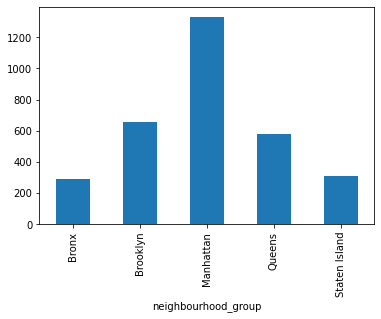

In [ ]:
# highest earning neighbourhood group
highest_revenue.plot(kind='bar')
plt.title('richest neighbourhood')
plt.xlabel('average price')
plt.ylabel('name of neighbourhood group')
plt.show()

highest revenue is earned by the neighbourhood group Manhatten.we can conclude that **Manhattan** area is much **crowdy** or **most demanded location**.

In [ ]:
number_of_reviews = airbnb.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].count().unstack()
number_of_reviews


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,378,652,60
Brooklyn,9554,10128,413
Manhattan,13196,7976,480
Queens,2096,3370,198
Staten Island,176,188,9


highest number of reviews is of **Manhattan** neighbourhood group for **entire home** room type which is **13196**.highest number of reviews of **private room** type is in **Brooklyn** neighbourhood group which is **10128**.the least number of reviews is of shared room type. we can conclude that people prefer the entire home most often followed by private room.

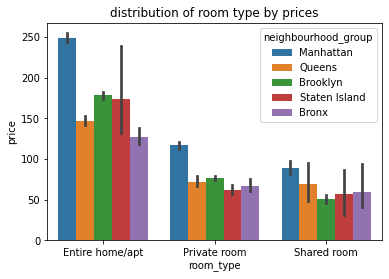

In [ ]:
# variation of price by room type in different neighbourhood group
sns.barplot(x='room_type',y='price',hue='neighbourhood_group',data=airbnb)
plt.title('distribution of room type by prices')
plt.show();

here we can see, in every room type highest price is for Manhattan neighbourhood group. and people pay highest price for entire home followed by private and share room. highest variation of prices is in Staten Island neighbourhood group for entire home.

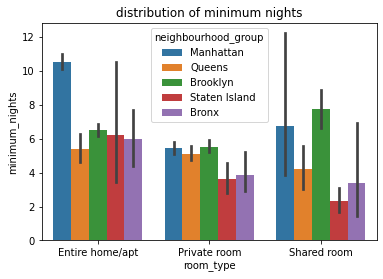

In [ ]:
# variation of night by room type in different neighbourhood group
sns.barplot(x='room_type',y='minimum_nights',hue='neighbourhood_group',data=airbnb)
plt.title('distribution of minimum nights')
plt.show();

here we can see highest average night where cutomer stays is in the Manhatten neighbourhood group of entire home room type. highest variation in the nights can be seen in Manhatten neighbourhood group of share room type.

In [ ]:
# here is the data of above graph for cross check
table_of_neighbourhood = airbnb.groupby(['neighbourhood_group','room_type']).agg({'price':'mean','minimum_nights':'mean'}).rename(columns={'price':'mean price','minimum_nights':'sum of nights'})
table_of_neighbourhood

mean price  sum of nights
neighbourhood_group room_type                                 
Bronx               Entire home/apt  127.645503       5.962963
                    Private room      66.788344       3.858896
                    Shared room       59.800000       3.366667
Brooklyn            Entire home/apt  178.355453       6.530982
                    Private room      76.510861       5.539791
                    Shared room       50.527845       7.753027
Manhattan           Entire home/apt  249.240831      10.540997
                    Private room     116.787613       5.449975
                    Shared room       88.977083       6.766667
Queens              Entire home/apt  147.050573       5.369752
                    Private room      71.776855       5.122552
                    Shared room       69.020202       4.232323
Staten Island       Entire home/apt  173.846591       6.238636
                    Private room      62.292553       3.632979
                    Shared room       57.444444       2.333333

Highest demand in Manhatten neighbourhood is for entire home. highest availability of rooms for staying is in Manhatten neighbourhood group. and highest host are in Manhatten neighbourhood group only.

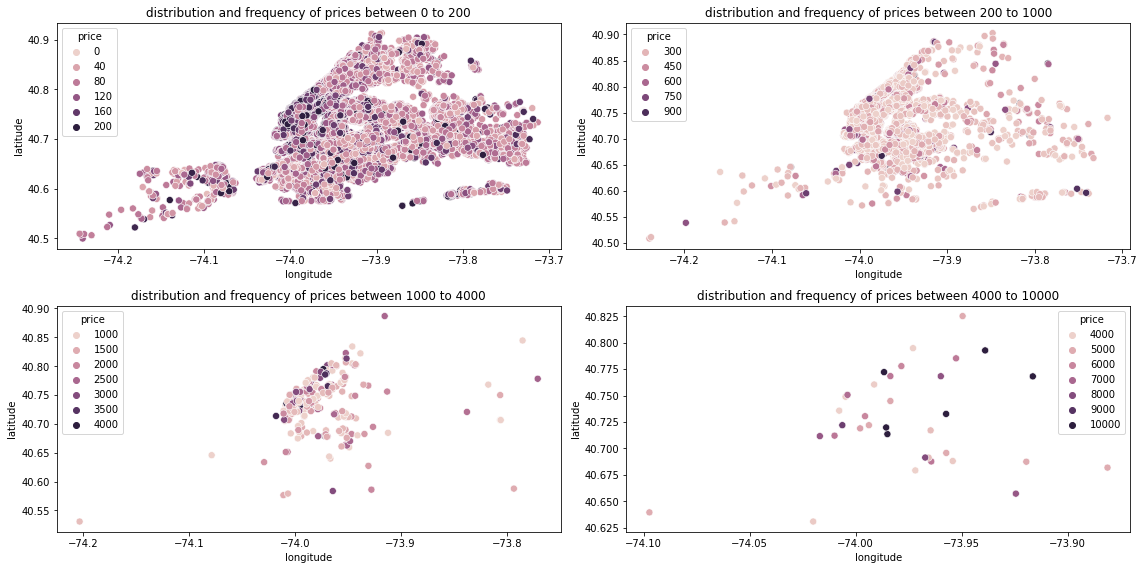

In [ ]:
#distribution and frequency of prices in different region
fig,axes =plt.subplots(2,2,figsize=(16,8))

axes[0,0].set_title('distribution and frequency of prices between 0 to 200')
sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=airbnb[airbnb['price']<=200].price,s=50,ax=axes[0,0])

axes[0,1].set_title('distribution and frequency of prices between 200 to 1000')
sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=airbnb[(200<=airbnb['price'])&(airbnb['price']<=1000)].price,s=50,ax=axes[0,1])

axes[1,0].set_title('distribution and frequency of prices between 1000 to 4000')
sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=airbnb[(1000<=airbnb['price'])&(airbnb['price']<=4000)].price,s=50,ax=axes[1,0])

axes[1,1].set_title('distribution and frequency of prices between 4000 to 10000')
sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=airbnb[(4000<=airbnb['price'])&(airbnb['price']<=10000)].price,s=50,ax=axes[1,1])

plt.tight_layout(pad=1)

here we can see that highest frequency of price range is between 0 to 200 followed by 200 to 1000. least frequency is in the price range of 4000 to 10000.

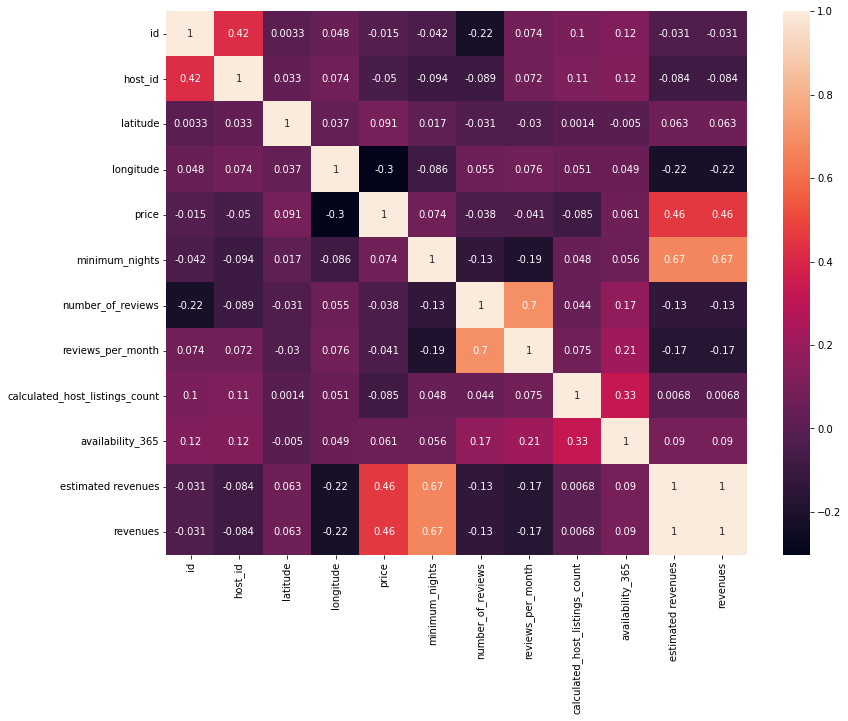

In [ ]:
corr = airbnb.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title=("Correlation Between Different Variables")
sns.heatmap(corr, annot=True)
plt.show()

here the highest correlation is between the number of reviews and reviews per month. followed by revenues and prices.

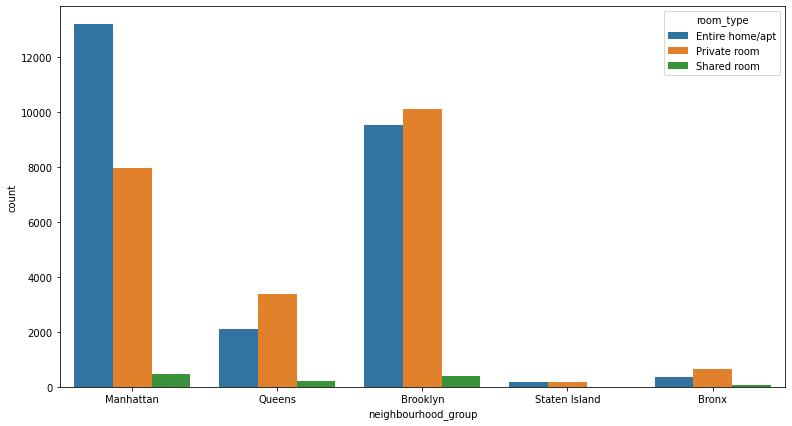

In [ ]:
plt.figure(figsize=(13,7))
plt.title=("Room Type on Neighbourhood Group")
sns.countplot(x=airbnb['neighbourhood_group'],hue=airbnb['room_type'])
plt.show();

highest listing by the customer is in Manhattan(for entire home) neighbourhood group followed by Brooklyn(for private room).

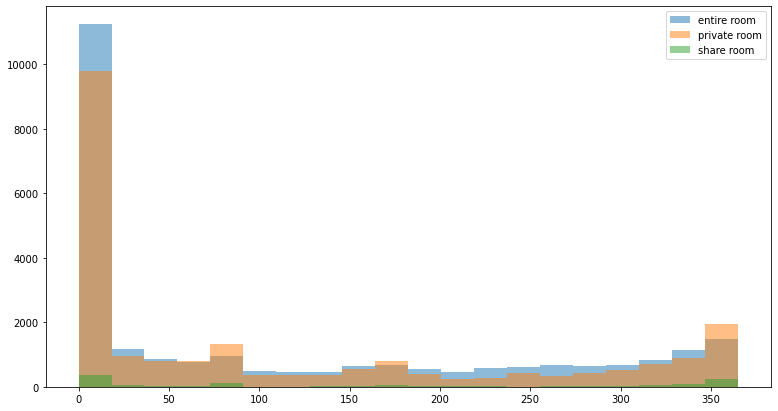

In [ ]:
#lets count the availability of room over the year
entire_room = airbnb[airbnb['room_type']=='Entire home/apt']
private_room = airbnb[airbnb['room_type']=='Private room']
share_room = airbnb[airbnb['room_type']=='Shared room']

plt.figure(figsize=(13,7))
plt.title=("count of availability of rooms over the year")
plt.hist(entire_room.availability_365,bins=20,alpha=0.5)
plt.hist(private_room.availability_365,bins=20,alpha=0.5)
plt.hist(share_room.availability_365,bins=20,alpha=0.5)
plt.legend(['entire room','private room','share room'])

plt.show();

here we can see that there is much less availability of room. most of the rooms are available only for 0-20 days probably.

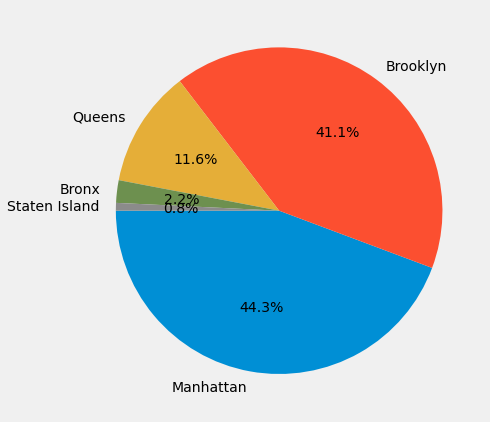

In [ ]:
#busiest neighbourhood group
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title=("Neighbourhood Group")
g = plt.pie(airbnb.neighbourhood_group.value_counts(), labels=airbnb.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

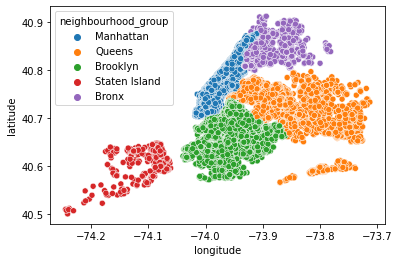

In [ ]:
# highest distribution of particular neighbourhood group
sns.scatterplot(data=airbnb['neighbourhood_group'],x=airbnb['longitude'],y=airbnb['latitude'],hue=airbnb['neighbourhood_group']);

here the wide distribution is of Queens neighbourhood group which lies between lattitude range of 40.8 to 40.55 and longitude range of -74.0 to -73.7.

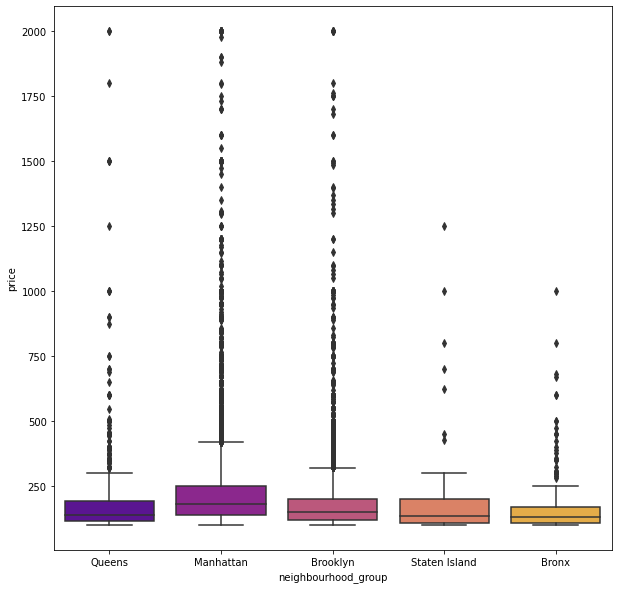

In [ ]:
price_above_100 = airbnb[(airbnb['price']>=100)&(airbnb['price']<=2000)]
plt.figure (figsize= (10,10))
ax= sns.boxplot(data=price_above_100,x='neighbourhood_group',y='price',palette='plasma')

in prices range there is no limit of fixing the prices. hence there are so many outliers occured in the prices.

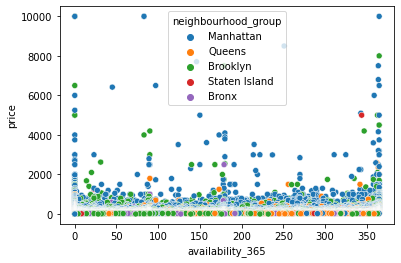

In [ ]:
ax = sns.scatterplot(data=airbnb,x='availability_365',y='price',hue='neighbourhood_group')
plt.title=("Scatterplot_availability_365")

From above plot we can see that most of the **rooms prefered by customers** are in the  **range of 0 to 2000**.
Very few are available for price above 2000$,this is quite obivious that there are very few peoples who prefer to have expensive rooms.
we can see that most of the **high range of price** is of **Manhattan and Brooklyn neighbourhood group**.

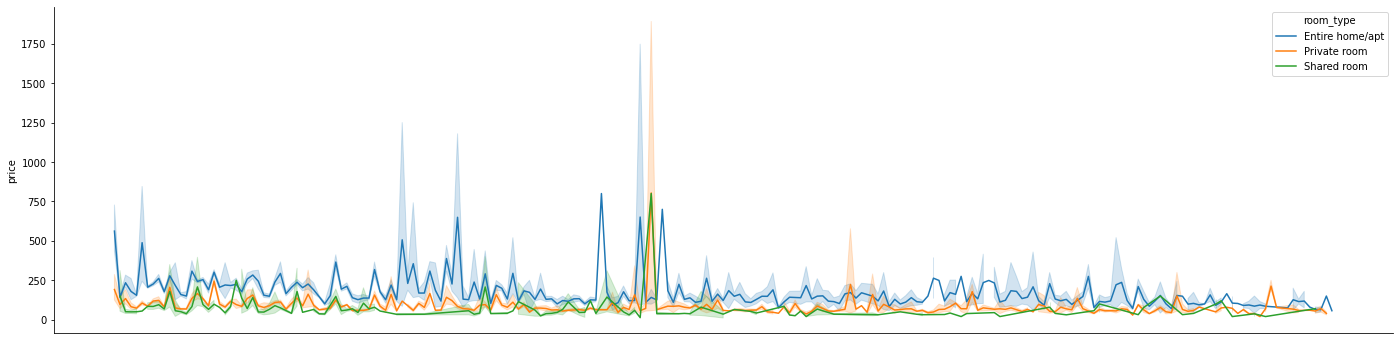

In [ ]:
fig = plt.figure(figsize=(24, 6))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
sns.lineplot(data=airbnb,x='neighbourhood',y='price',hue='room_type')
plt.title=('distribution of prices in the neighbourhood')
sns.despine(fig)

Most of the neighbourhood has kept the ***price range of all room type*** between **0-250**. highest average range of price is for entire home by the neighbourhood.

In [ ]:
categorical_data = airbnb[['id','host_name','number_of_reviews','neighbourhood_group','price','room_type','minimum_nights','availability_365']].sort_values('minimum_nights',ascending=False)
categorical_data

,id,host_name,number_of_reviews,neighbourhood_group,price,room_type,minimum_nights,availability_365
5767,4204302,Genevieve,2,Manhattan,180,Entire home/apt,1250,365
2854,1615764,Peter,0,Manhattan,400,Entire home/apt,1000,362
38664,30378211,Meg,0,Manhattan,110,Shared room,999,365
13404,10053943,Glenn H.,2,Manhattan,99,Entire home/apt,999,42
26341,20990053,Angie,24,Brooklyn,79,Private room,999,249
...,...,...,...,...,...,...,...,...
4852,3457770,Alexia,1,Manhattan,110,Entire home/apt,1,0
4102,2636139,Heather,5,Brooklyn,110,Entire home/apt,1,85
47725,35879296,Alonzo,1,Manhattan,110,Private room,1,157
3019,1766846,S & G,233,Manhattan,110,Entire home/apt,1,17


maximum stay of nights is by **listing id-4204302** in the neighbourhood group Manhattan rented by the host **Genevieve** also availability of that particular entire home is over the year. here we can see that price is reasonable which is **180$**. we can conclude that customer prefered to stay in the long run where the ***price rate is reasonable*** and which **area is much more popular** which is of Manhattan. also we can see that people prefer mostly Manhattan neighbourhood group for long stay.

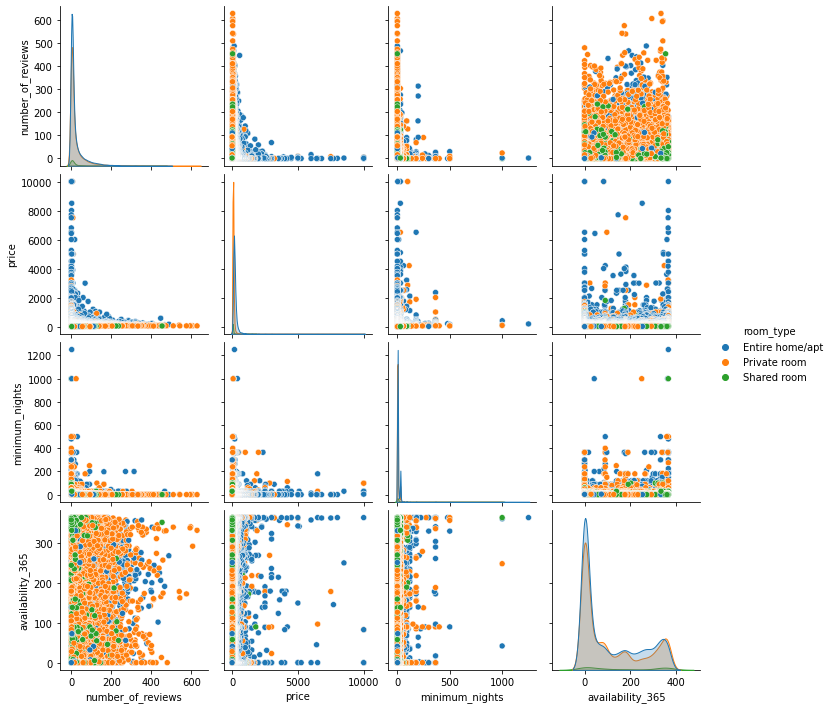

In [ ]:
sns.pairplot(categorical_data,hue='room_type');

we can see from above pairplot that as the price increases number of reviews decreases. and the **lower price = higher number of reviews**. also we can see that **most of the number of reviews** are from those who **stay for 0-100 nights**. we can see as we go upper along the minimum night axis it is begining to diminished. also we can say that people mostly prefer to **stay at night at max for 200 days** over the year.
 also we can see that **highest number of reviews** are getting by the listing whose **price range is between 0-100$**. also **highest number of reviews is getting by the listing of private room type**.
